In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import tensorflow as tf
import os
import cv2
import random
from imutils import paths

In [ ]:
# import zipfile
# with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Dataset/Dog and Cat/train 500.zip","r") as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/Dataset/Dog and Cat/train/")

In [3]:
DIRECTORY=r'/content/drive/MyDrive/Colab Notebooks/Dataset/Dog and Cat/train'
CATEGORIES=['Cat','Dog']
data=[]

In [4]:
for categoriy in CATEGORIES:
  label=CATEGORIES.index(categoriy)
  print(label)

0
1


In [5]:
for categoriy in CATEGORIES:
  path=os.path.join(DIRECTORY,categoriy)
  for img in os.listdir(path):
    # Visiting each image
    img_path=os.path.join(path,img)

    #cat=0 and dog=1
    label=CATEGORIES.index(categoriy)

    # Read each image and converting into grayscal with 60*60 dim
    arr=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    new_arr=cv2.resize(arr,(120,120))
    
    data.append([new_arr,label])

In [6]:
data[0]

[array([[167, 174, 175, ..., 210, 207, 204],
        [168, 174, 175, ..., 212, 208, 205],
        [167, 174, 175, ..., 213, 209, 207],
        ...,
        [126, 128, 129, ...,   3,   3,   2],
        [126, 127, 130, ...,   3,   3,   3],
        [123, 125, 128, ...,   2,   2,   2]], dtype=uint8), 0]

In [7]:
data[0][0].shape

(120, 120)

In [8]:
random.shuffle(data)

In [9]:
X=[]
y=[]

In [10]:
for feature,label in data:
  X.append(feature)
  y.append(label)

In [11]:
X=np.array(X)
y=np.array(y)

In [12]:
# Noramlize 
X=X/255

In [13]:
X[0]

array([[0.47843137, 0.58431373, 0.69411765, ..., 0.35686275, 0.34901961,
        0.35294118],
       [0.40784314, 0.52156863, 0.69019608, ..., 0.36470588, 0.34901961,
        0.35294118],
       [0.56078431, 0.62745098, 0.72156863, ..., 0.32156863, 0.32156863,
        0.32156863],
       ...,
       [0.25098039, 0.29803922, 0.27843137, ..., 0.37254902, 0.40392157,
        0.45882353],
       [0.26666667, 0.29803922, 0.30980392, ..., 0.74901961, 0.83137255,
        0.92156863],
       [0.23921569, 0.25882353, 0.27843137, ..., 0.92941176, 0.96078431,
        0.82745098]])

In [14]:
X.shape

(1001, 120, 120)

In [15]:
X=X.reshape(-1,120,120,1)

In [16]:
X.shape

(1001, 120, 120, 1)

In [17]:
X.shape[1:]

(120, 120, 1)

In [18]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".1f")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

#CNN Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,LeakyReLU,PReLU
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [85]:


# creating the Model
classifer=Sequential()

No_filter=64
filter_size=(3,3)

#Adding 1st Conv Layer
classifer.add(Conv2D(32,filter_size,activation='relu'))
classifer.add(MaxPool2D((2,2)))

#Adding 2nd Conv Layer
classifer.add(Conv2D(No_filter,filter_size,activation='relu'))
classifer.add(MaxPool2D((2,2)))


# Adding Flatten layer
classifer.add(Flatten())

#Adding first hidden layer
classifer.add(Dense(512,input_shape=X[1:].shape,activation='relu'))
classifer.add(Dropout(0.4))
#Adding second hidden layer
classifer.add(Dense(512,input_shape=X[1:].shape,activation='relu'))
classifer.add(Dropout(0.4))


# Adding output layer
classifer.add(Dense(1,activation='sigmoid'))

In [86]:
# complie the model 
# Default Ir=0.001
classifer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [88]:
# train the CNN Model
model_history=classifer.fit(X,y,validation_split=0.3,epochs=100,callbacks=[early_stopping])

Epoch 1/100
22/22 [==============================] - 1s 34ms/step - loss: 0.9419 - accuracy: 0.5229 - val_loss: 0.6929 - val_accuracy: 0.4850
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 0.6909 - accuracy: 0.5543 - val_loss: 0.6913 - val_accuracy: 0.5415
Epoch 3/100
22/22 [==============================] - 1s 28ms/step - loss: 0.6874 - accuracy: 0.5414 - val_loss: 0.7058 - val_accuracy: 0.4618
Epoch 4/100
22/22 [==============================] - 1s 25ms/step - loss: 0.6720 - accuracy: 0.5600 - val_loss: 0.6702 - val_accuracy: 0.6246
Epoch 5/100
22/22 [==============================] - 1s 24ms/step - loss: 0.5891 - accuracy: 0.6986 - val_loss: 0.7012 - val_accuracy: 0.6246
Epoch 6/100
22/22 [==============================] - 1s 25ms/step - loss: 0.4134 - accuracy: 0.8100 - val_loss: 0.7368 - val_accuracy: 0.6445
Epoch 7/100
22/22 [==============================] - 1s 28ms/step - loss: 0.2683 - accuracy: 0.8829 - val_loss: 0.9200 - val_accuracy: 0.6279
Epoch 

In [89]:
classifer.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 118, 118, 32)      320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 50176)             0         
                                                                 
 dense_24 (Dense)            (None, 512)             

In [90]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

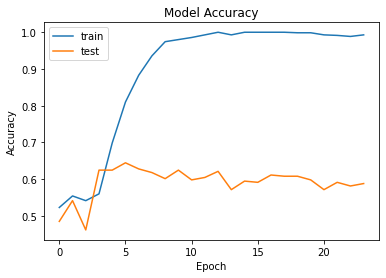

In [91]:
# Graph Between ACC and Epoch
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()


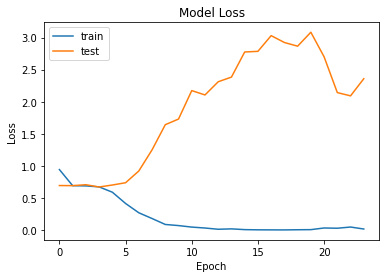

In [92]:
# Graph Between Loss and Epoch
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title("Model Loss")

plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
# y_pred=classifer.predict(X_test)


In [ ]:
# y_pred

In [ ]:
# model_Eval(y_test,y_pred)

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/Dataset/Dog and Cat/train/Dog/dog.101.jpg

In [107]:
test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/Dog and Cat/test/dog1.jpg',cv2.IMREAD_GRAYSCALE)

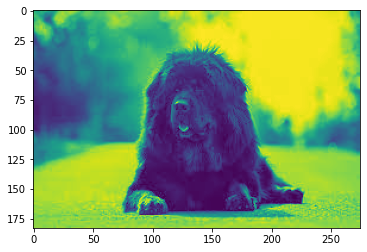

In [108]:
plt.imshow(test_img)

In [109]:
new_arr=cv2.resize(test_img,(120,120))

In [110]:
test_input =new_arr.reshape(-1,120,120,1)

In [111]:
test_input.shape

(1, 120, 120, 1)

In [112]:
#cat=0 and dog=1

In [113]:
classifer.predict(test_input)

1/1 [==============================] - 0s 16ms/step


array([[0.]], dtype=float32)